In [41]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from natsort import natsorted
from pathlib import Path
from monolayer_tracking.image_segmentation import segment_stack
from tqdm.notebook import tqdm

from monolayer_tracking.image_segmentation import segment_img
from skimage import io
from cellpose import models
import cellpose.utils as cp_utils

# Segmentation

## Load Data
Find the relevant raw data file paths

In [7]:
#-------------MODIFY THESE-------------
dataset="20240310 FUCCI halo sorted col_glass low_density" # name of the dataset folder
stack_format="membrane-stage_*.tif" # how the stacks are named within the dataset folder
segmentation_channel="membrane" # 'membrane' or 'nuclei' or 'ZO-1'
#--------------------------------------

stacks_location=f"F:/my_data/Data/{dataset}/" # path to the dataset folder
files=natsorted(glob(stacks_location+stack_format))
len(files)

0

In [ ]:
# load FUCCI
dataset="20240311 FUCCI halo sorted col_glass high_density"
stack_format='membrane-stage_*.tif'
PIP_format='PIP-stage_*.tif'
geminin_format='geminin-stage_*.tif'
stacks_location=f'F:/my_data/Data/{dataset}/'
files=[[natsorted(glob(stacks_location+file_format))[-1]] for file_format in [stack_format, PIP_format, geminin_format]]
print([len(f) for f in files])

In [ ]:
# load FUCCI
dataset="20240311 FUCCI halo sorted col_glass high_density"
stack_format='membrane-stage_*.tif'
PIP_format='PIP-stage_*.tif'
geminin_format='geminin-stage_*.tif'
stacks_location=f'F:/my_data/Data/{dataset}/'
files=[[natsorted(glob(stacks_location+file_format))[-1]] for file_format in [stack_format, PIP_format, geminin_format]]
print([len(f) for f in files])

In [ ]:
root_dir=r'Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered/'
files=natsorted(glob(root_dir+'*RGB.tif'))
files

['Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile1_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile2_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile3_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile4_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile5_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile6_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile7_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile8_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile9_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\tile10_RGB.tif',
 'Y:\\my_data\\W1\\20240715 FUCCI halo ME 6days adhered_suspended\\adhered\\til

## Segment Data

In [ ]:
cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

In [ ]:
output_folder=Path(r'Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\segmented/adhered/')
output_folder.mkdir(exist_ok=True, parents=True)

for file in tqdm(files):
    print(file)
    img=io.imread(file)
    export=segment_img(img, cp_model, size_model, color_channels=[3,0], mend=True, tiled_edge=True, membrane_channel=2)
    np.save(f'{output_folder}/{Path(file).stem}_seg.npy', export)

  0%|          | 0/12 [00:00<?, ?it/s]

Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile1_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile2_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile3_RGB.tif


c:\Users\Andy\anaconda3\envs\cellpose\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Andy\anaconda3\envs\cellpose\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile4_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile5_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile6_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile7_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile8_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile9_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile10_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile11_RGB.tif
Y:\my_data\W1\20240715 FUCCI halo ME 6days adhered_suspended\adhered\tile12_RGB.tif


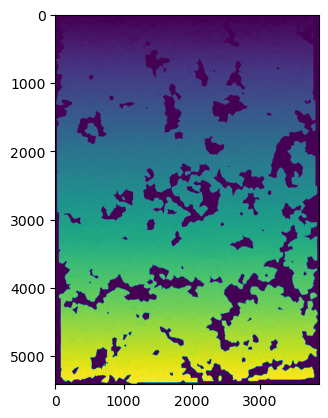

In [ ]:
plt.imshow(export['masks'])

In [ ]:
output_folder=Path(f'F:/my_data/Segmentation/{dataset}/segmented/')
for membrane_path, pip_path, geminin_path in zip(*files):
    print(membrane_path)
    stack_folder=output_folder/Path(membrane_path.replace('membrane', 'FUCCI')).stem
    segment_stack(membrane_path, output_path=stack_folder, segmentation_channel='FUCCI', pip_path=pip_path, geminin_path=geminin_path, color_channels=[2,1], initial_frame_number=0)

F:/my_data/Data/20240311 FUCCI halo sorted col_glass high_density\membrane-stage_20.tif


  0%|          | 0/132 [00:00<?, ?it/s]

In [ ]:
from monolayer_tracking import celltool_parallel as ctp
from tqdm.notebook import tqdm
import pandas as pd

segmented_stages=natsorted(glob('F:/my_data/Data/20240311 FUCCI halo sorted col_glass high_density/Segmentation/*'))

progress=tqdm(segmented_stages)
for stage_dir in progress:
    progress.set_description(Path(stage_dir).stem)
    ctp.export_smoothed_contours(stage_dir, output_path=None, verbose=True, chunk_kwargs=dict(size=100))

In [ ]:
# load pickled smoothed contours
contour_dirs=natsorted(glob('F:/my_data/Data/20240311 FUCCI halo sorted col_glass high_density/Segmentation/contours/*'))
smoothed_contours=pd.read_pickle(contour_dirs[0]+'/smoothed_contours.pkl')
print(len(smoothed_contours))

In [ ]:
# segment membrane
for membrane_path in files:
    print(membrane_path)
    segment_stack(membrane_path)

In [ ]:
reference_contour=ctp.sample_reference_contour(smoothed_contours)
progress=tqdm(contour_dirs)
for contour_dir in progress:
    progress.set_description(Path(stage_dir).stem)
    ctp.export_aligned_contours(contour_dir, reference_contour, chunk_kwargs=dict(size=8))

In [ ]:
# segment FUCCI
output_folder=Path(f'F:/my_data/Segmentation/{dataset}/segmented/')
for membrane_path, pip_path, geminin_path in zip(*files):
    print(membrane_path)
    stack_folder=output_folder/Path(membrane_path.replace('membrane', 'FUCCI')).stem
    segment_stack(membrane_path, output_path=stack_folder, segmentation_channel='FUCCI', pip_path=pip_path, geminin_path=geminin_path, color_channels=[2,1])

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_7.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_8.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_9.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_10.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_11.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_12.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_13.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_14.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_15.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_16.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_17.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_18.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_19.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_20.tif


  0%|          | 0/122 [00:00<?, ?it/s]

## Adhered Cells

In [2]:
def get_stitched_boundary(membrane, radius=2):
    from scipy.signal import convolve2d

    boundary=convolve2d(membrane==0, np.ones((2*radius+1,2*radius+1)), mode='same')!=0
    boundary[0]=boundary[-1]=boundary[:,0]=boundary[:,-1]=True

    return boundary

def remove_edge_masks(membrane, masks, radius=2):
    boundary=get_stitched_boundary(membrane, radius)
    # remove all masks that touch the edge
    edge_masks=np.unique(masks[boundary])[1:]
    
    new_masks=masks.copy()
    new_masks[np.isin(new_masks, edge_masks)]=0
    new_masks=np.unique(new_masks, return_inverse=True)[1].reshape(masks.shape) # renumber masks to consecutive integers with edge masks removed
    return new_masks

In [ ]:
from natsort import natsorted
from glob import glob
from skimage import io
from cellpose import models
from monolayer_tracking.image_segmentation import segment_img

img_paths=natsorted(glob(r"Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day1\*RGB.ome.tiff"))
for img_path, label in zip(img_paths, ['30k', '300k']):
    print(img_path)
    imgs=io.imread(img_path)

    output_path=r'Y:\my_data\W1\\20240806-10 FUCCI halo 768k coverslip suspended\segmented/'+label+'/'
    Path(output_path).mkdir(exist_ok=True, parents=True)

    cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
    size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

    for i, img in enumerate(tqdm(imgs)):
        export=segment_img(img[...,2], cp_model, size_model, mend=False)
        #export['masks']=remove_edge_masks(export['img'], export['masks'])
        export['img']=img

        np.save(output_path+f'{label}-{i}_seg.npy', export)

In [42]:
glob(r'Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\composite\colony_region4.tif')

['Y:\\Heather\\24-07-18 MDCK time lapse QPM with Heather\\composite\\colony_region4.tif']

In [43]:
# Heather NORI
root_dir=r'Y:\Heather\24-07-18 MDCK time lapse QPM with Heather'

cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

for img_path in natsorted(glob(r'Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\composite\colony_region4.tif')):#natsorted(glob(root_dir+"/p1_*/*denoised - RGB.tif*")):
    print(img_path)
    condition=str(Path(img_path).stem).split('_')[1]
    output_path=f'{root_dir}/segmented/{condition}/'

    print('saving to', output_path)
    imgs=io.imread(img_path)
    print(imgs.shape)
    Path(output_path).mkdir(exist_ok=True, parents=True)
    
    for i, img in enumerate(tqdm(imgs)):
        #img=np.stack([np.zeros_like(img[0]), img[0], img[1]], axis=-1) # add a blank red channel for p1_50k
        export=segment_img(img[...,2], cp_model, size_model, mend=False)
        #export['masks']=remove_edge_masks(export['img'], export['masks'])
        export['img']=img[...,:-1]
        export['QPM']=img[...,-1]

        np.save(output_path+f'/{condition}-{i}_seg.npy', export)

Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\composite\colony_region4.tif
saving to Y:\Heather\24-07-18 MDCK time lapse QPM with Heather/segmented/region4/
(49, 216, 216, 4)


  0%|          | 0/49 [00:00<?, ?it/s]

KeyboardInterrupt: 

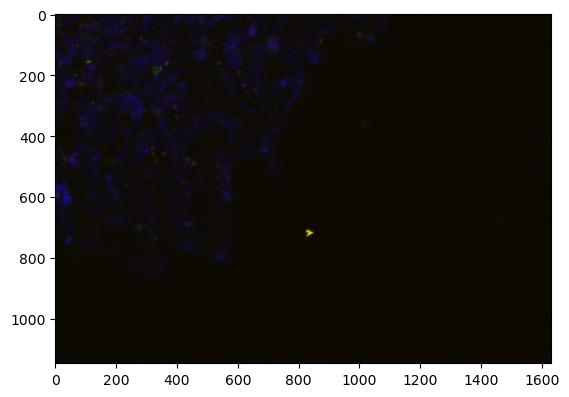

In [9]:
from monolayer_tracking import preprocessing
plt.imshow(preprocessing.normalize(imgs[0][...,:-1], quantile=(0,1)))

In [13]:
bounds=np.quantile(imgs[...,:-1].reshape(-1,3), (0,1), axis=0)
bounds

array([[ 493.,  486.,  486.],
       [ 687.,  929., 1317.]])

In [25]:
img=preprocessing.normalize(imgs[-1], bounds=bounds.T)

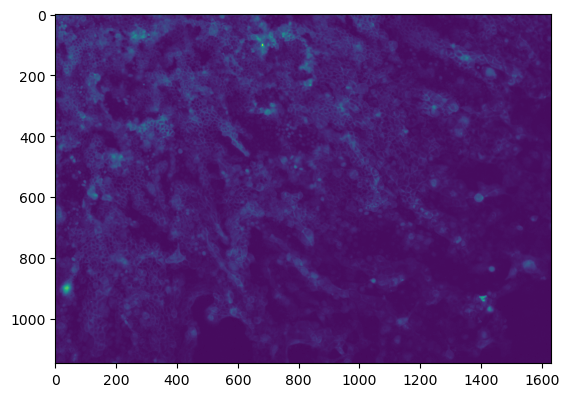

In [29]:
plt.imshow(np.sum(img, axis=-1))

In [44]:
# Heather QPM FUCCI
root_dir=r'Y:\Heather\24-07-18 MDCK time lapse QPM with Heather'

cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

for img_path in natsorted(glob(r'Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\composite\colony_region4.tif')):#natsorted(glob(root_dir+"/p1_*/*denoised - RGB.tif*")):
    print(img_path)
    condition=str(Path(img_path).stem).split('_')[1]
    output_path=f'{root_dir}/segmented/{condition}/'

    print('saving to', output_path)
    imgs=io.imread(img_path)
    QPM=imgs[...,-1]
    imgs=imgs[...,:-1]

    bounds=np.quantile(imgs.reshape(-1,3), (0,1), axis=0).T
    Path(output_path).mkdir(exist_ok=True, parents=True)
    
    for i, img in enumerate(tqdm(imgs)):
        normalized=preprocessing.normalize(img, bounds=bounds)
        nuclei=np.mean(normalized[...,:2], axis=-1)
        membrane=normalized[...,2]
        
        export=segment_img(np.stack([nuclei, membrane], axis=-1), cp_model, size_model, color_channels=[2,1], mend=False)
        #export['masks']=remove_edge_masks(export['img'], export['masks'])
        export['img']=img
        export['QPM']=QPM[i]

        np.save(output_path+f'/{condition}-{i}_seg.npy', export)

Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\composite\colony_region4.tif
saving to Y:\Heather\24-07-18 MDCK time lapse QPM with Heather/segmented/region4/


  0%|          | 0/49 [00:00<?, ?it/s]

In [35]:
from monolayer_tracking.segmented_comprehension import Image

test=Image(r"Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\segmented\region1\region1-0_seg.npy", load_img=True)
test2=Image(r"Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\segmented\membrane\region1\region1-0_seg.npy", load_img=True)

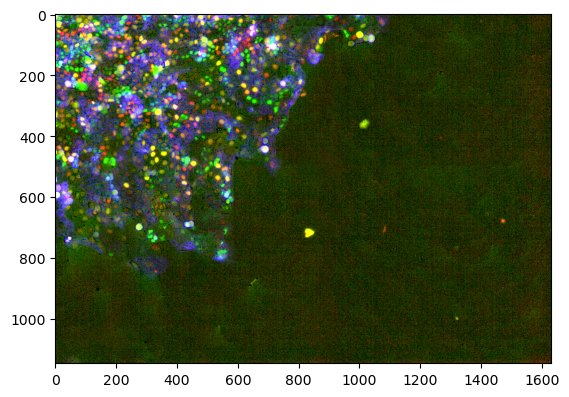

In [38]:
plt.imshow(preprocessing.normalize(test.img))

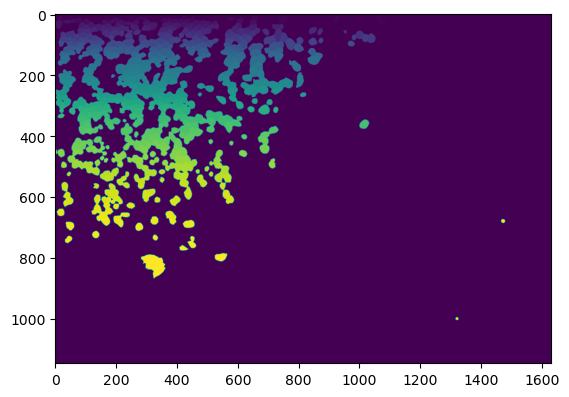

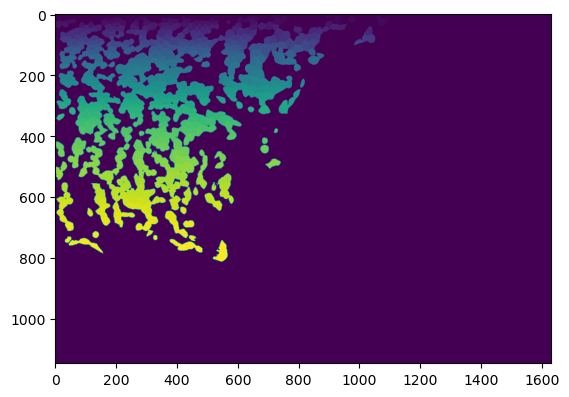

In [36]:
plt.imshow(test.masks)
plt.show()
plt.imshow(test2.masks)

In [7]:
from monolayer_tracking.segmented_comprehension import Image

test=Image(r"Y:\Heather\24-07-18 MDCK time lapse QPM with Heather\segmented\region1\region1-0_seg.npy", load_img=True)

In [25]:
from monolayer_tracking import preprocessing
import importlib

preprocessing=importlib.reload(preprocessing)

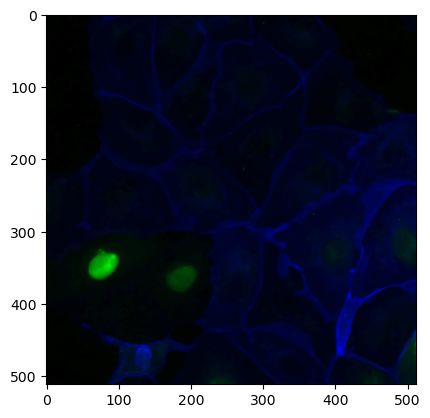

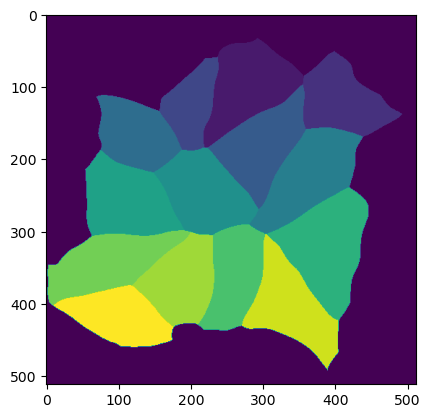

In [29]:
plt.imshow(preprocessing.normalize(img, mask_zeros=False))
plt.show()

plt.imshow(export['masks'])

In [ ]:
root_dir=r"Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well"
natsorted(glob(root_dir+"/day*/* - RGB.ome.tif*"))[-4:]

['Y:\\my_data\\W1\\20240809-14 FUCCI halo 300k 12-well\\day5\\30k_adhered - RGB.ome.tif',
 'Y:\\my_data\\W1\\20240809-14 FUCCI halo 300k 12-well\\day5\\300k_adhered - RGB.ome.tif',
 'Y:\\my_data\\W1\\20240809-14 FUCCI halo 300k 12-well\\day6\\30k_adhered - RGB.ome.tif',
 'Y:\\my_data\\W1\\20240809-14 FUCCI halo 300k 12-well\\day6\\300k_adhered - RGB.ome.tif']

In [ ]:
# 12-well adhered
root_dir=r"Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well"

cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

for img_path in natsorted(glob(root_dir+"/day*/* - RGB.ome.tif*"))[-4:]:
    print(img_path)
    condition=Path(img_path).stem.split('_')[0]
    output_path=f'{root_dir}/segmented/adhered/{Path(img_path).parent.stem}/{condition}/'
    print('saving to', output_path)
    imgs=io.imread(img_path)
    Path(output_path).mkdir(exist_ok=True, parents=True)

    for i, img in enumerate(tqdm(imgs)):
        export=segment_img(img[...,2], cp_model, size_model, mend=False)
        #export['masks']=remove_edge_masks(export['img'], export['masks'])
        export['img']=img

        np.save(output_path+f'/{condition}-{i}_seg.npy', export)

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day5\30k_adhered - RGB.ome.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/adhered/day5/30k/


  0%|          | 0/4 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day5\300k_adhered - RGB.ome.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/adhered/day5/300k/


  0%|          | 0/4 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day6\30k_adhered - RGB.ome.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/adhered/day6/30k/


  0%|          | 0/4 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day6\300k_adhered - RGB.ome.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/adhered/day6/300k/


  0%|          | 0/4 [00:00<?, ?it/s]

## Suspended Cells

In [ ]:
folder_path=r'F:\Heather\FUCCI\suspended\04262024ME treatments\tifs'
folders=natsorted(glob(folder_path+'/*'))
output_path=Path(folder_path.replace('tifs','segmented'))
output_path.mkdir(exist_ok=True, parents=True)
model=models.CellposeModel(gpu=True, model_type='cyto3')
diameter=23

for treatment in tqdm(folders, desc='treatment'):
    files=natsorted(glob(treatment+'/*.tif'))
    stem=Path(treatment).stem
    for i, img_path in enumerate(tqdm(files, desc=stem)):
        #output_folder=Path(img_path.replace('split','segmented')).parent
        output_folder=Path(output_path/stem)
        output_folder.mkdir(exist_ok=True, parents=True)
        img=io.imread(img_path)
        img=np.array([img[1], img[2], img[0]]) # re-order channels, discard DAPI if it's the fourth channel
        masks=model.eval(img, diameter=diameter, channels=[3,0])[0]
        masks=cp_utils.remove_edge_masks(masks)
        outlines=cp_utils.masks_to_outlines(masks)
        outlines_list=cp_utils.outlines_list(masks)
        export={'img':img, 'masks':masks, 'outlines':outlines, 'outlines_list':outlines_list}
        np.save(output_folder/f'{stem}-{i}_seg.npy', export)

In [ ]:
from monolayer_tracking.image_segmentation import segment_img
def get_stitched_boundary(membrane, radius=2):
    from scipy.signal import convolve2d

    boundary=convolve2d(membrane==0, np.ones((2*radius+1,2*radius+1)), mode='same')!=0
    boundary[0]=boundary[-1]=boundary[:,0]=boundary[:,-1]=True

    return boundary

def remove_edge_masks(membrane, masks, radius=2):
    boundary=get_stitched_boundary(membrane, radius)
    # remove all masks that touch the edge
    edge_masks=np.unique(masks[boundary])[1:]

    new_masks=masks.copy()
    new_masks[np.isin(new_masks, edge_masks)]=0
    new_masks=np.unique(new_masks, return_inverse=True)[1].reshape(masks.shape) # renumber masks to consecutive integers with edge masks removed
    return new_masks

In [ ]:
imgs=io.imread('Y:\\my_data\\W1\\20240809-14 FUCCI halo 300k 12-well\\day2\\30k_suspended - thresholded.tif')

In [ ]:
cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

diams=[]
for img in tqdm(imgs):
    diameter, style_diams=size_model.eval(img[...,2])
    diams.append(diameter)

In [ ]:
# 12-well suspended
from monolayer_tracking import preprocessing
from cellpose import utils

root_dir=r"Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well"

cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

for img_path in natsorted(glob(root_dir+"/day*/30k_suspended - thresholded.tif*")):
    print(img_path)
    condition=Path(img_path).stem.split('_')[0]
    output_path=f'{root_dir}/segmented/suspended/{Path(img_path).parent.stem}/{condition}/'
    print('saving to', output_path)
    imgs=io.imread(img_path)
    Path(output_path).mkdir(exist_ok=True, parents=True)

    for i, img in enumerate(tqdm(imgs)):
        export_filepath=Path(output_path+f'/{condition}-{i}_seg.npy')
        if export_filepath.exists():
            continue
        masks, flows, styles = cp_model.eval(img[...,2], diameter=30)
        outlines=preprocessing.masks_to_outlines(masks)
        
        outlines_list=utils.outlines_list_multi(masks)
        export={'img':img, 'masks':masks, 'outlines':outlines, 'outlines_list':outlines_list}
        #export['masks']=remove_edge_masks(export['img'], export['masks'])
        export['img']=img

        np.save(export_filepath, export)

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day1\30k_suspended - thresholded.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/suspended/day1/30k/


  0%|          | 0/225 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day2\30k_suspended - thresholded.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/suspended/day2/30k/


  0%|          | 0/225 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day3\30k_suspended - thresholded.tiff
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/suspended/day3/30k/


  0%|          | 0/225 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day4\30k_suspended - thresholded.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/suspended/day4/30k/


  0%|          | 0/225 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day5\30k_suspended - thresholded.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/suspended/day5/30k/


  0%|          | 0/225 [00:00<?, ?it/s]

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day6\30k_suspended - thresholded.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/suspended/day6/30k/


  0%|          | 0/225 [00:00<?, ?it/s]

In [ ]:
Path(r"Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\segmented\suspended\day1\30k\30k-0_seg.npy").exists()

True

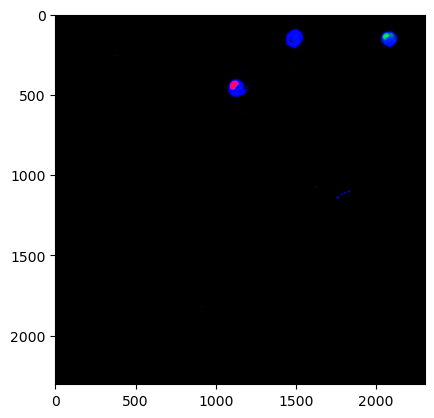

In [ ]:
plt.imshow(preprocessing.normalize(img.transpose(0,2,1)))

In [ ]:
# 12-well suspended
from monolayer_tracking import preprocessing
from cellpose import utils

root_dir=r"Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well"

cp_model=models.CellposeModel(gpu=True, model_type='cyto3')
size_model=models.SizeModel(cp_model, pretrained_size='C:\\Users\\Andy\\.cellpose\\models\\size_cyto3.npy')

for img_path in natsorted(glob(root_dir+"/day*/*_suspended - thresholded.tif*"))[:1]:
    print(img_path)
    condition=Path(img_path).stem.split('_')[0]
    output_path=f'{root_dir}/segmented/suspended/{Path(img_path).parent.stem}/{condition}/'
    print('saving to', output_path)
    imgs=io.imread(img_path).transpose(0,2,3,1)
    Path(output_path).mkdir(exist_ok=True, parents=True)

    
    for i, img in enumerate(tqdm(imgs)):
        export=segment_img(img[...,2], cp_model, size_model, mend=False)
        
        outlines=preprocessing.masks_to_outlines(masks)
        
        outlines_list=utils.outlines_list_multi(masks)
        export={'img':img, 'masks':masks, 'outlines':outlines, 'outlines_list':outlines_list}
        #export['masks']=remove_edge_masks(export['img'], export['masks'])
        export['img']=img

        np.save(output_path+f'/{condition}-{i}_seg.npy', export)

Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\day6\30k_suspended - thresholded.tif
saving to Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well/segmented/suspended/day6/30k/


  0%|          | 0/225 [00:00<?, ?it/s]

## Verify Segmentation Efficacy

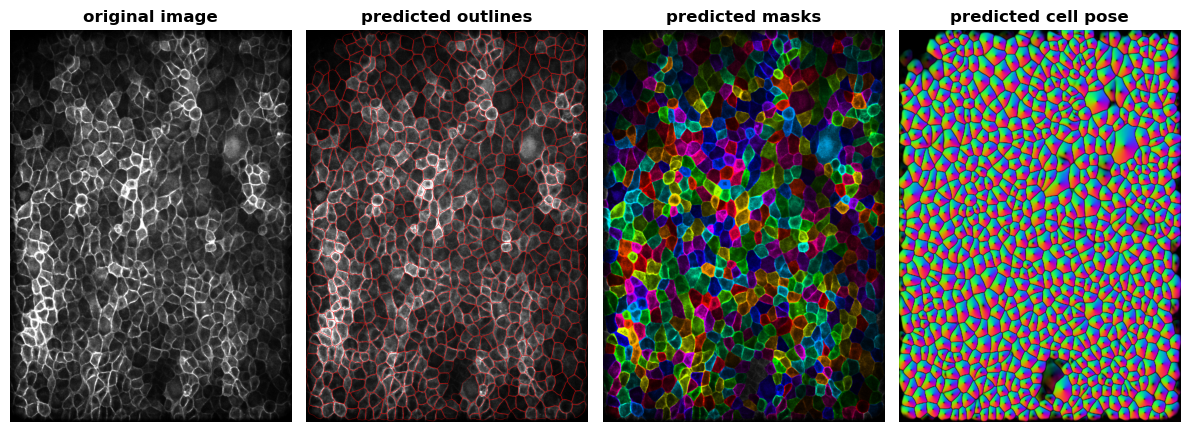

In [ ]:
# cyto2 vs my model
from cellpose import plot
stacks_location="Data/20230508 halo glass lines incubator - good glass/"
channels=[0,0]

#stack=io.imread(stacks_location+'stage_1.tif')

#masks, flows, styles = user_cyto.eval(stack[0], diameter=None, channels=channels)

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, stack[0], masks, flows[0], channels=channels)
plt.tight_layout()
#plt.savefig('Plots/Physics 335 Report/segmentation-demo.tif',dpi=300)

#masks, flows, styles, diams = cyto2.eval(stack[0], diameter=None, channels=channels)

#fig = plt.figure(figsize=(12,5))
#plot.show_segmentation(fig, stack[0], masks, flows[0], channels=channels)
#plt.tight_layout()
#plt.show()

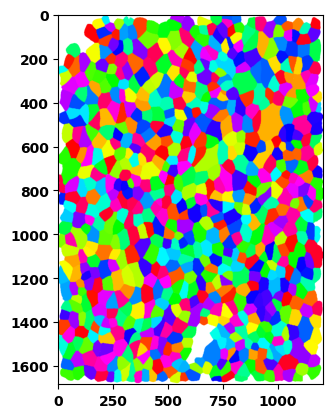

In [ ]:
#plt.imshow(plot.mask_rgb(masks))
plt.imshow(stack[0])
plt.imshow(plot.mask_overlay(stack[0], masks))

plt.savefig('Plots/Physics 335 Report/masks.png',dpi=300)
#plt.tight_layout()
#plt.show()

# Train New Model

In [ ]:
# training my own model

from cellpose import models
trainer_model=models.CellposeModel(gpu=True, model_type='cyto2')
stacks_location="C:/Users/Gardel Lab/Desktop/20230728/"
images=[]
labels=[]
for file in glob(stacks_location+'*seg.npy'):
    data=np.load(file, allow_pickle=True).item()
    images.append(data['img'])
    labels.append(data['masks'])

trainer_model.train(images,labels,channels=[0,0],save_path=stacks_location, model_name='20230728_PDMS_cyto2', n_epochs=1000)